# Overfitting-Part 1

In this lesson you are going to learn about the ***Validation*** set and how it helps the problem of overfitting. 

> What is overfitting? 

This is when you create a model that performs very well on your training data (hooray!). But is performs pretty bad on your test data (sad face). The good news is that there are options to deal with this issue.

> What is a **validation set**?  

Let's recap on the terms we are already familiar with.

* Training set - This is the data you will be training your model with.  
* Test set - This is the data you will be testing your model with. The test set should not contain data that is in the training set.  

> What do we do with the Training set?  

This is the data we are going to use to train our model.

> What do we do with the Test set?  

After training is complete, we try out our model with our Test data. If our model does well, then we did a great job in the training phase. Note that our test data will not contain any of the data we used for training.

## So What is a Validation set and why would we want one?  

A Validation set is an estimation of the Test set. The Validation set does not contain data from the Training or test set. We use the Validation set during training. Typically what we do is for every N iterations (epochs), we "test" our model using the Validation set. We want to see how our model is doing while training and before we run our model through our test data. If the Validation set says we are 95% accurate, then we can say that when we try our model on the Test set, we should get something close to 95% accuracy also. Makes sense?

> Any advantages of using a Validation set?  

Yes, by using a Validation set one can determine if overfitting is a problem. For example, lets say you started training and you notice your Training error is going down but your Validation error is going up. This is a classic sign that you have an overfitting problem.  

> what can I do if I notice that I am overfitting?  

As soon as you realize you are starting to overfit, simply stop training. This is called ***early stopping*** and it works great at preventing your model from overfitting. 

# Let's Get to Work!

In [1]:
# import libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import sys
import datetime
import matplotlib.pyplot as plt
plt.style.use('ggplot') # use this plot style
%matplotlib inline

In [2]:
print('Python version ' + sys.version)
print('Tensorflow version ' + tf.VERSION)
print('Pandas version ' + pd.__version__)
print('Numpy version ' + np.__version__)

Python version 3.6.3 |Anaconda, Inc.| (default, Nov  3 2017, 12:34:11) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
Tensorflow version 1.1.0
Pandas version 0.20.3
Numpy version 1.12.1


# Function to model

    y = a * x^4 + b  


> TIP: Recommended percentages  

* Training - ***70%***
* Validation - ***15%***
* Test - ***15%***

In [7]:
# generate 1000 samples
pool = np.random.rand(1000,1).astype(np.float32);

#Shuffle samples
np.random.shuffle(pool)

# sample size 15%
sample = int(1000 * 0.15)

# 15% test
test_x = pool[0:sample]

# 15% validation
valid_x = pool[sample:2*sample]

# 75% train
train_x = pool[sample*2:]

print('test data shape:',test_x.shape)
print('valid data shape:',valid_x.shape)
print('train data shape:',train_x.shape)

g = lambda x : 2.0*x**4 + 5
test_y = g(test_x)
valid_y = g(valid_x)
train_y = g(train_x)

test data shape: (150, 1)
valid data shape: (150, 1)
train data shape: (700, 1)


In [10]:
df = pd.DataFrame({
    'x':train_x[:,0],
    'y':train_y[:,0]
})
df.head()

,x,y
0,0.397300,5.049832
1,0.325346,5.022408
2,0.150818,5.001035
3,0.501556,5.126564
4,0.208463,5.003777


In [11]:
df.describe()

,x,y
count,700.000000,700.000000
mean,0.498834,5.389704
std,0.284085,0.524198
min,0.002081,5.000000
25%,0.256512,5.008659
50%,0.497650,5.122667
75%,0.747219,5.623483
max,0.998294,6.986386


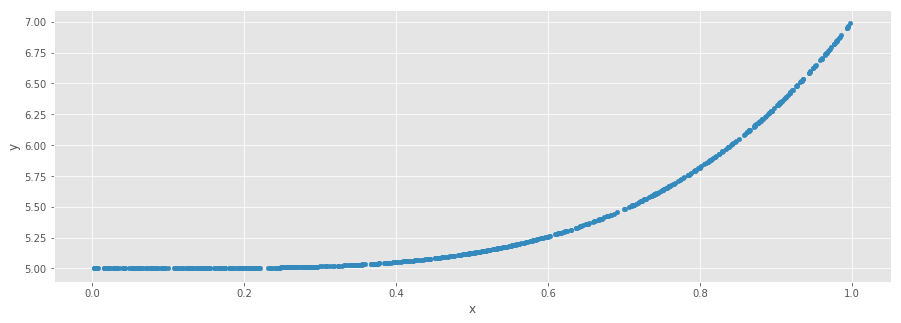

In [15]:
df.plot.scatter(x='x',y='y',figsize=(15,5))